In [39]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, fftshift
import skimage

In [208]:
font = {
    "fontname": "fbb",
}

def show_gray(ax, img, title="", **kwargs):
    ax.imshow(img, cmap="gray", interpolation="nearest", **kwargs)
    ax.axis("off")
    ax.set_title(title, fontdict=font)

In [223]:
lwir_path = "../../data/misc/extracted/thermal/flir_20191114T122220.jpg"
rgb_path = "../../data/misc/extracted/visible/flir_20191114T122220.jpg"

lwir = skimage.io.imread(lwir_path) / 255
gray = np.mean(skimage.io.imread(rgb_path), -1) / 255

x, y = gray.shape
fac = 0.09
gray = gray[int(x*fac):int(x*(1-fac)), int(y*fac):int(y*(1-fac))]
gray = cv2.resize(gray, (y, x))

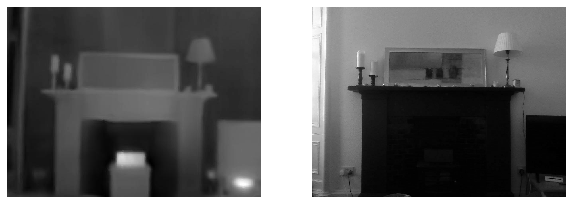

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
show_gray(ax[0], lwir)
show_gray(ax[1], gray)

## Image mean and std

In [225]:
print(f"LWIR\t mean: {np.mean(lwir)},\t std: {np.std(lwir)}")
print(f"RGB\t mean: {np.mean(rgb)},\t std: {np.std(rgb)}")

LWIR	 mean: 0.23845481004901964,	 std: 0.12042047624107324
RGB	 mean: 0.3275202684983458,	 std: 0.27947896241884573


## Fourier transform

In [226]:
gray.max()

0.98943368358146

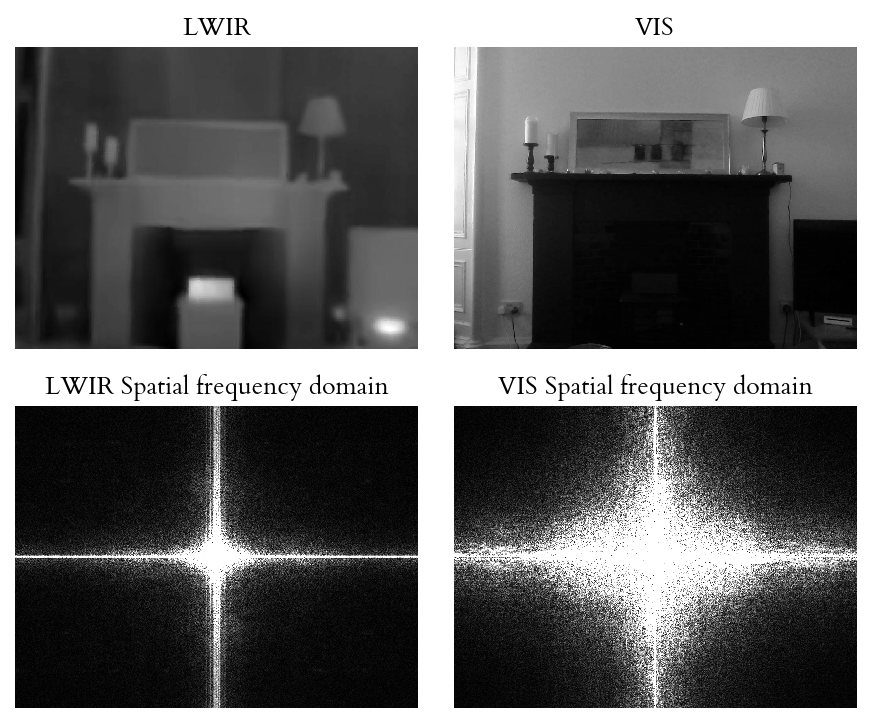

In [237]:
lwir_fourier = np.abs(fftshift(fft2(lwir)))
gray_fourier = np.abs(fftshift(fft2(gray)))

vmax = 15

fig, ax = plt.subplots(2, 2, figsize=(6, 5), dpi=150)

show_gray(ax[0][0], lwir, "LWIR")
show_gray(ax[0][1], gray, "VIS")

show_gray(ax[1][0], lwir_fourier, "LWIR Spatial frequency domain", vmin=0, vmax=vmax)
show_gray(ax[1][1], gray_fourier, "VIS Spatial frequency domain", vmin=0, vmax=vmax)

fig.tight_layout()

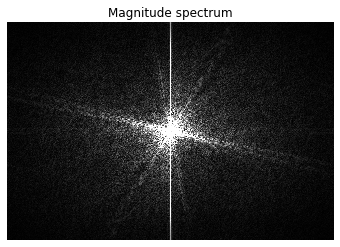

In [139]:
img = skimage.color.rgb2gray(skimage.io.imread("/Users/lindronics/workspace/4th_year/cvma/lab_2/res/kodim20.png")) / 255
# show_gray(img,  "Original")

# A.2
# Remember the fftshift!
fig, ax = plt.subplots(1)
dft = np.abs(fftshift(fft2(img)))
show_gray(ax, dft, "Magnitude spectrum", vmin=0, vmax=1)

# # A.3
# # Must invert the fftshift first, before trying to do ifft
# ift = ifft2((ifftshift(dft)))
# show_gray(np.real(ift), "Inverted")

# # A.4
# show_gray(np.real(ift)-img, "Difference", vmin=0, vmax=1)

In [114]:
(gray == img).all()

False

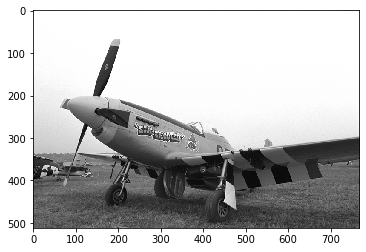

In [121]:
plt.imshow(gray, cmap="gray")

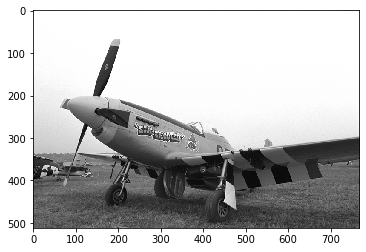

In [123]:
plt.imshow(gray, cmap="gray")